# Lead Scoring Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Importing Necessary Libaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, accuracy_score
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings;warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.isna().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
# Dropped columns which had null values greater than 40 %
df.drop(columns = ["Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score",
                   "Asymmetrique Profile Score"],axis = 1,inplace = True)

In [8]:
continous_cols = df.select_dtypes(include = ["int64","float64"]).columns
categorical_cols = df.select_dtypes(include = "object").columns
target = df["Converted"]

### Exploratory Data Analysis

### Univarite Analysis 

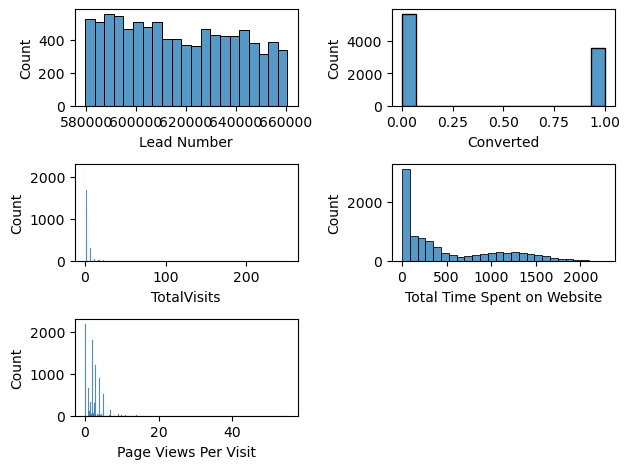

In [9]:
fignum = 0
for i in continous_cols:
    fignum = fignum +1
    plt.subplot(3,2,fignum)
    sns.histplot(x = df[i])
plt.tight_layout()
plt.show()

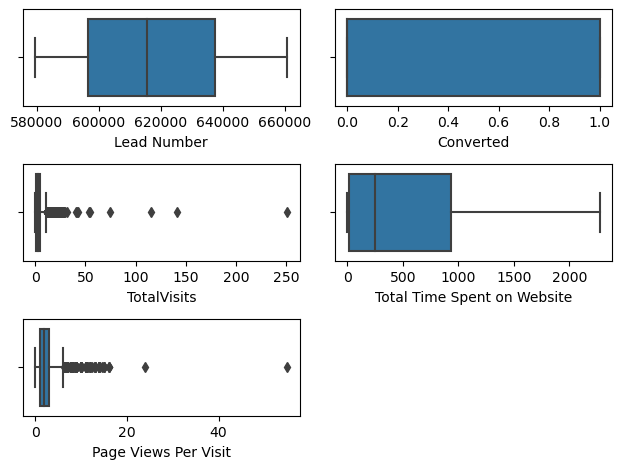

In [10]:
fignum = 0
for i in continous_cols:
    fignum = fignum +1
    plt.subplot(3,2,fignum)
    sns.boxplot(x = df[i])
plt.tight_layout()
plt.show()

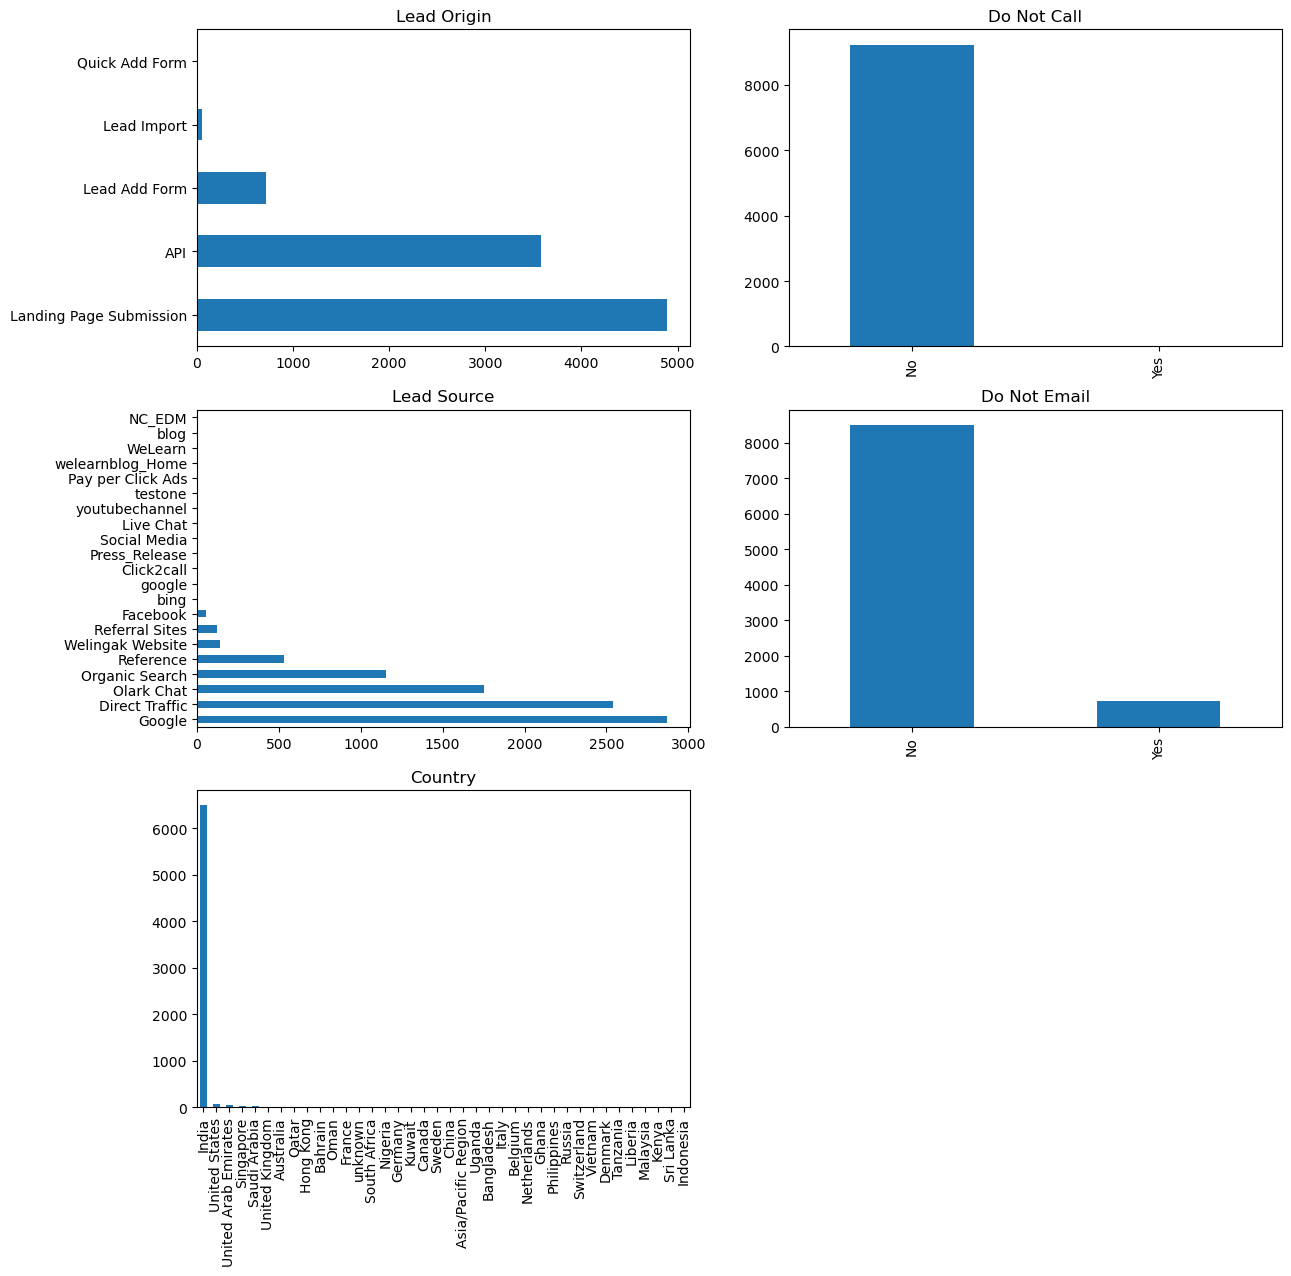

In [11]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
plt.title('Lead Origin')
df['Lead Origin'].value_counts().plot.barh()
plt.subplot(3,2,2)
plt.title('Do Not Call')
df['Do Not Call'].value_counts().plot.bar()
plt.subplot(3,2,3)
plt.title('Lead Source')
df['Lead Source'].value_counts().plot.barh()
plt.subplot(3,2,4)
plt.title('Do Not Email')
df['Do Not Email'].value_counts().plot.bar()
plt.subplot(3,2,5)
plt.title('Country')
df['Country'].value_counts().plot.bar()
plt.show()

The column Country doesnt serve a purpose, since it is completely skewed
, the column Lead Source, has only few features useful in getting the leads, others dont have any contribution

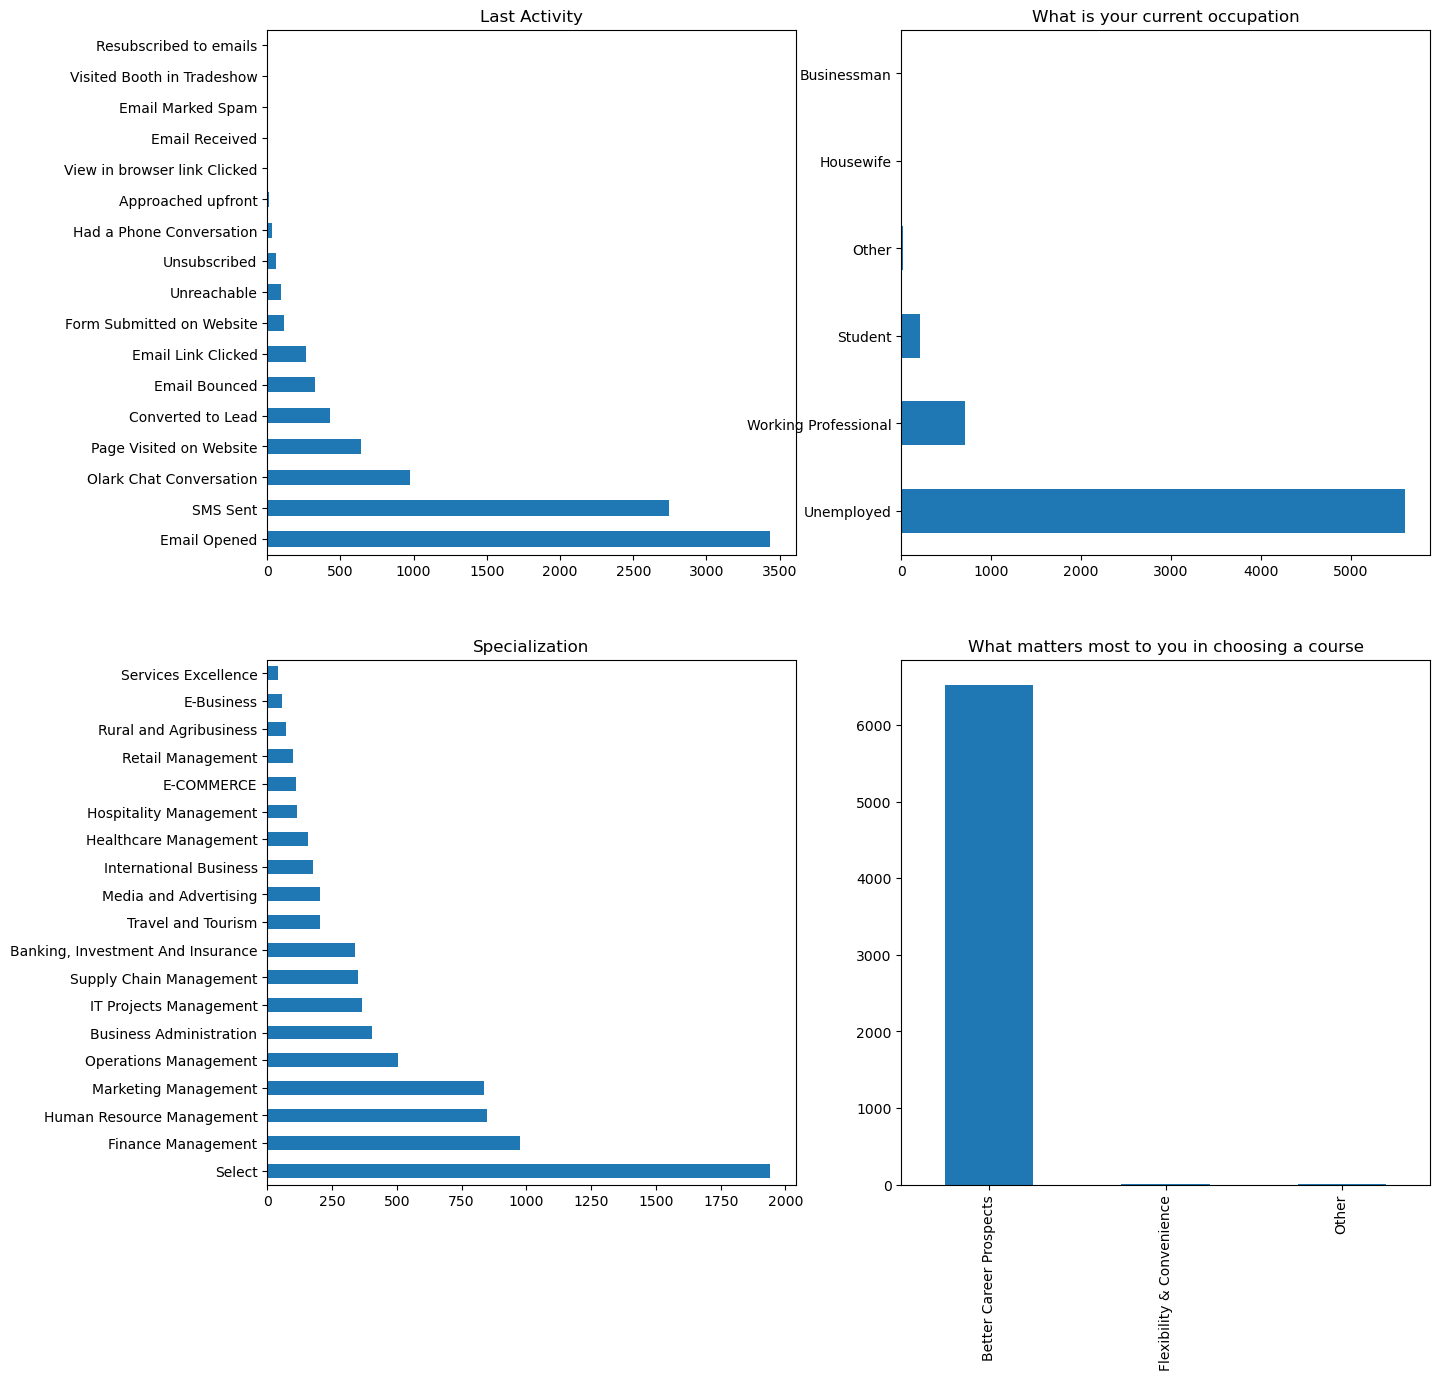

In [12]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('Last Activity')
df['Last Activity'].value_counts().plot.barh()
plt.subplot(2,2,2)
plt.title('What is your current occupation')
df['What is your current occupation'].value_counts().plot.barh()
plt.subplot(2,2,3)
plt.title('Specialization')
df['Specialization'].value_counts().plot.barh()
plt.subplot(2,2,4)
plt.title('What matters most to you in choosing a course')
df['What matters most to you in choosing a course'].value_counts().plot.bar()
plt.show()

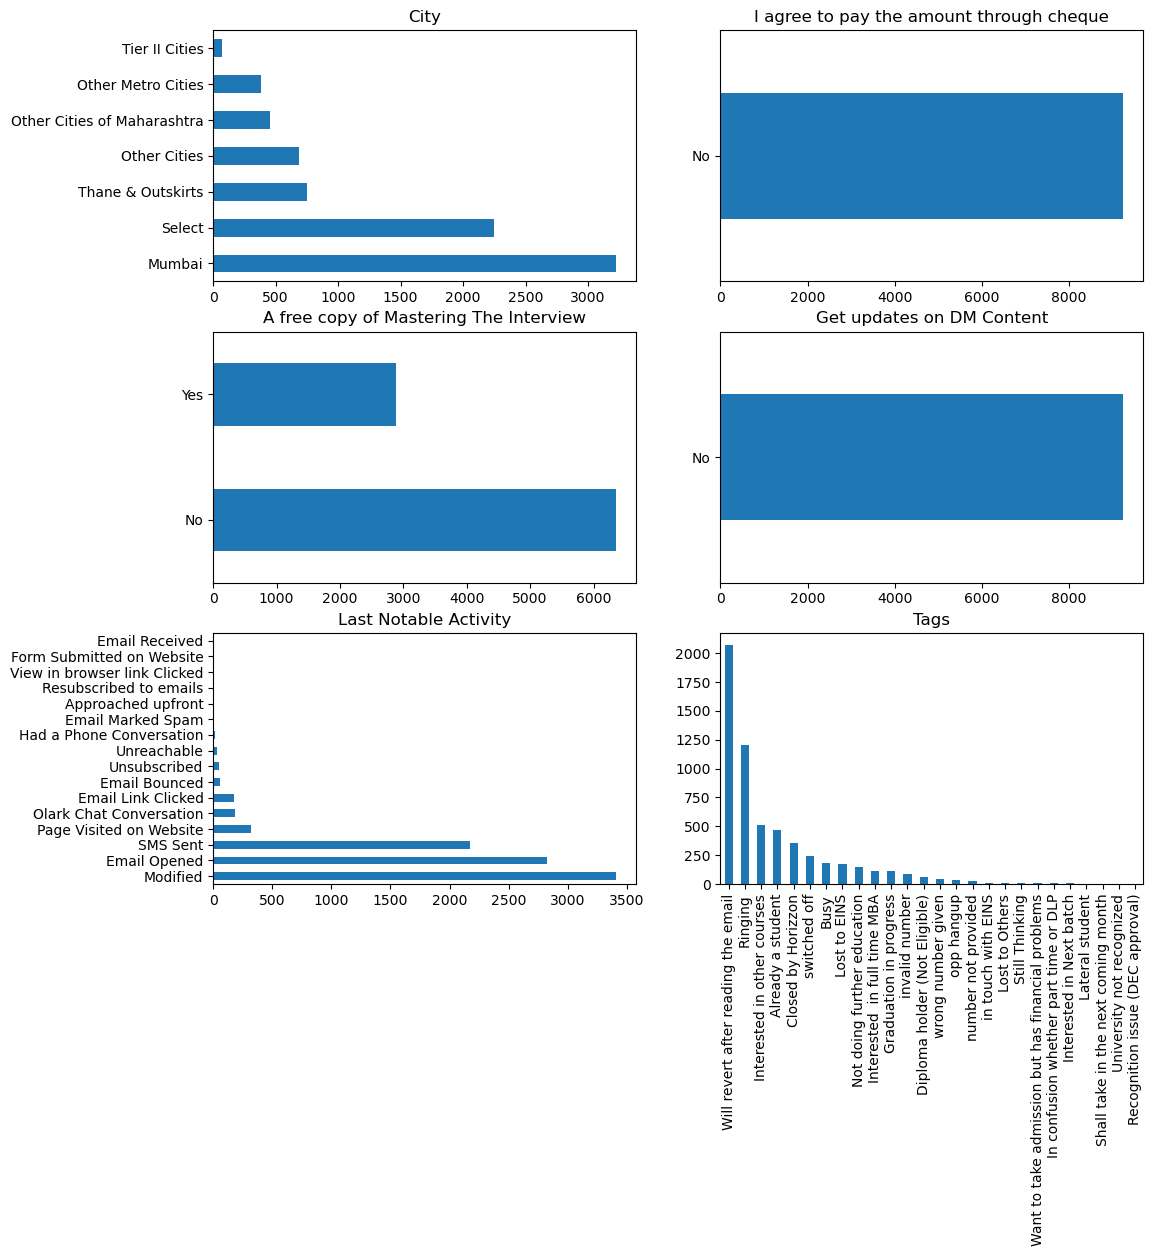

In [13]:
plt.figure(figsize=(12,15))
plt.subplot(4,2,1)
plt.title('City')
df['City'].value_counts().plot.barh()
plt.subplot(4,2,2)
plt.title('I agree to pay the amount through cheque')
df['I agree to pay the amount through cheque'].value_counts().plot.barh()
plt.subplot(4,2,3)
plt.title('A free copy of Mastering The Interview')
df['A free copy of Mastering The Interview'].value_counts().plot.barh()
plt.subplot(4,2,3)
plt.title('A free copy of Mastering The Interview')
df['A free copy of Mastering The Interview'].value_counts().plot.barh()
plt.subplot(4,2,4)
plt.title('Get updates on DM Content')
df['Get updates on DM Content'].value_counts().plot.barh()
plt.subplot(4,2,5)
plt.title('Last Notable Activity')
df['Last Notable Activity'].value_counts().plot.barh()
plt.subplot(4,2,6)
plt.title('Tags')
df['Tags'].value_counts().plot.bar()
plt.show()

### Bivariate Analysis 

<Axes: >

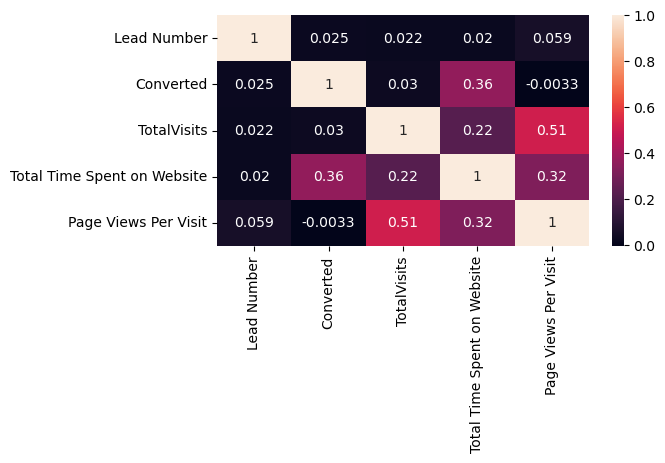

In [14]:
plt.figure(figsize = (6,3))
sns.heatmap(df.corr(),annot = True)

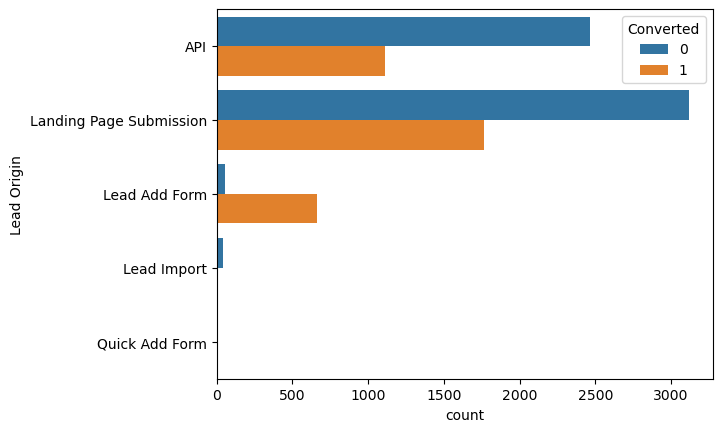

In [15]:
sns.countplot(y=df['Lead Origin'],hue=df.Converted)
plt.show()

Landing page Submission, has more than 50% conversion rate 
API has the least conversion rate among all three which is less than 50%

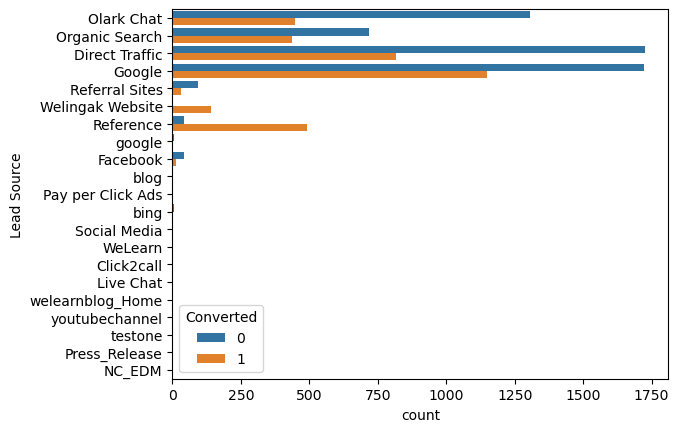

In [16]:
sns.countplot(y=df['Lead Source'],hue=df.Converted)
plt.show()

Out of all the lead sources, Reference, Welingak website, Google, Organic search have good conversion rates

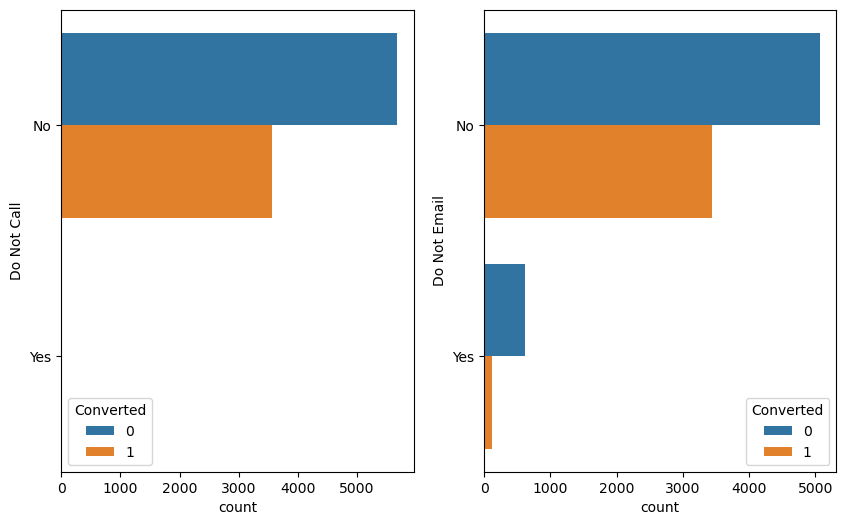

In [17]:
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
sns.countplot(y=df['Do Not Call'],hue=df.Converted)
plt.subplot(1,2,2)
sns.countplot(y=df['Do Not Email'],hue=df.Converted)
plt.show()
plt.show()

There is no inference from both the columns, as majority customers do not want to recieve emails and calls from the customers

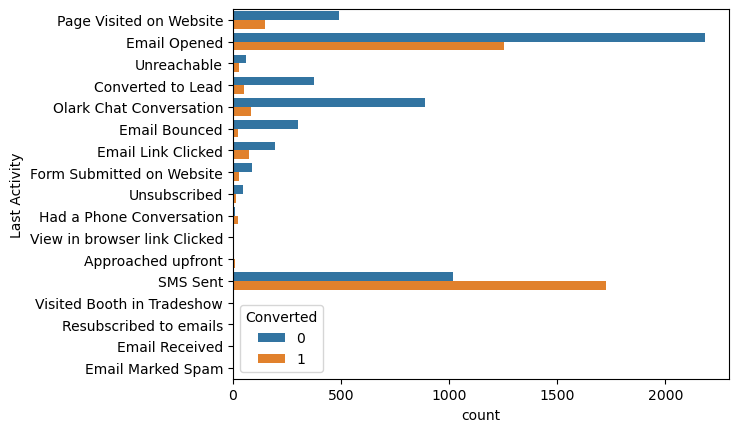

In [18]:
sns.countplot(y=df['Last Activity'],hue=df.Converted)
plt.show()

 SMS sent has great conversion rate after which comes email opened.

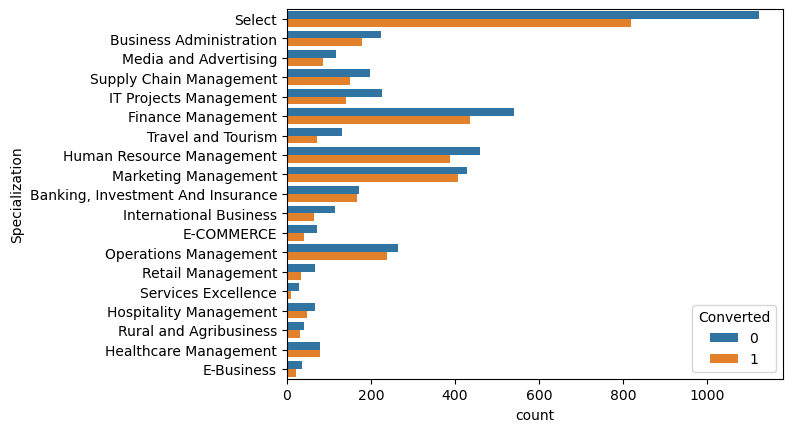

In [19]:
sns.countplot(y=df['Specialization'],hue=df.Converted)
plt.show()

Specialization column is an important one since the conversion rate for a lot of specializations is very good and can be an important column in modellin

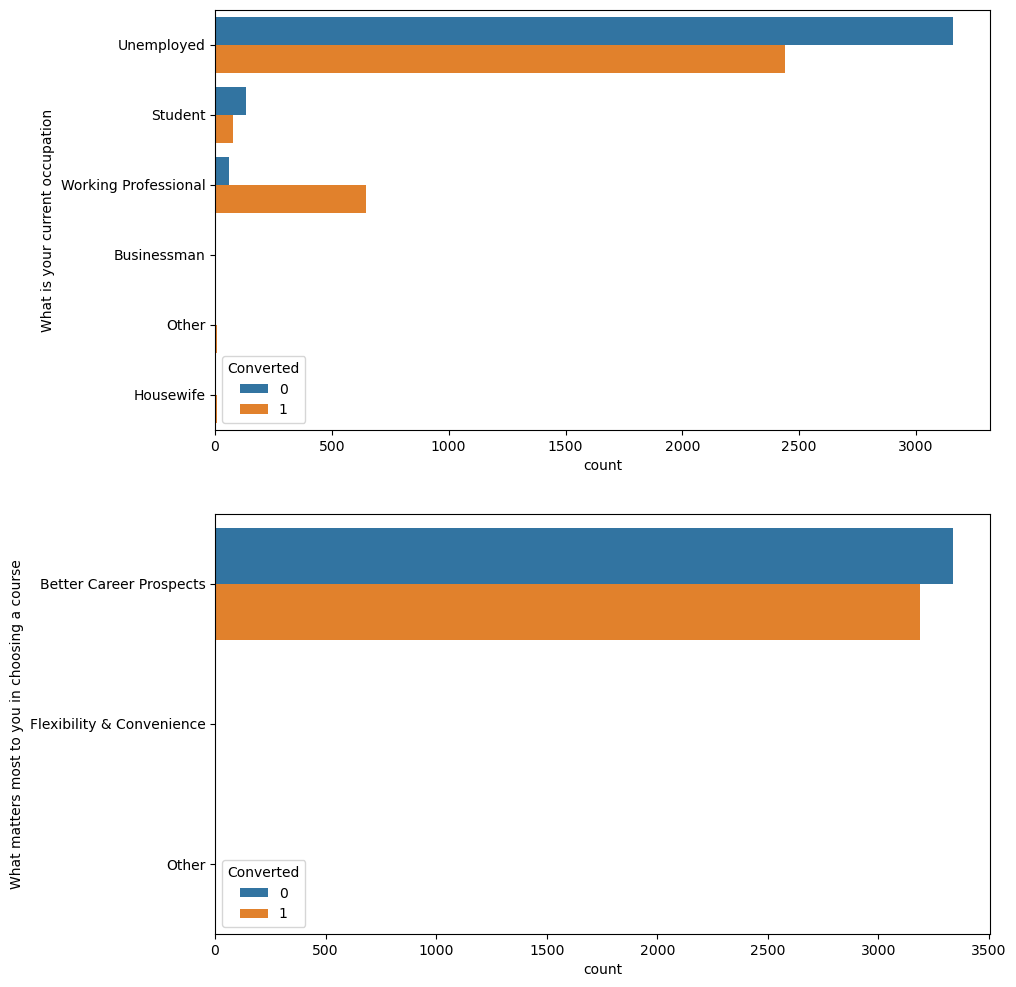

In [20]:
plt.figure(figsize=[10,12])
plt.subplot(2,1,1)
sns.countplot(y=df['What is your current occupation'],hue=df.Converted)
plt.subplot(2,1,2)
sns.countplot(y=df['What matters most to you in choosing a course'],hue=df.Converted)
plt.show()

It looks like unemployed customers and working professionals have the highest conversion rate, the company should target these categories of customers more

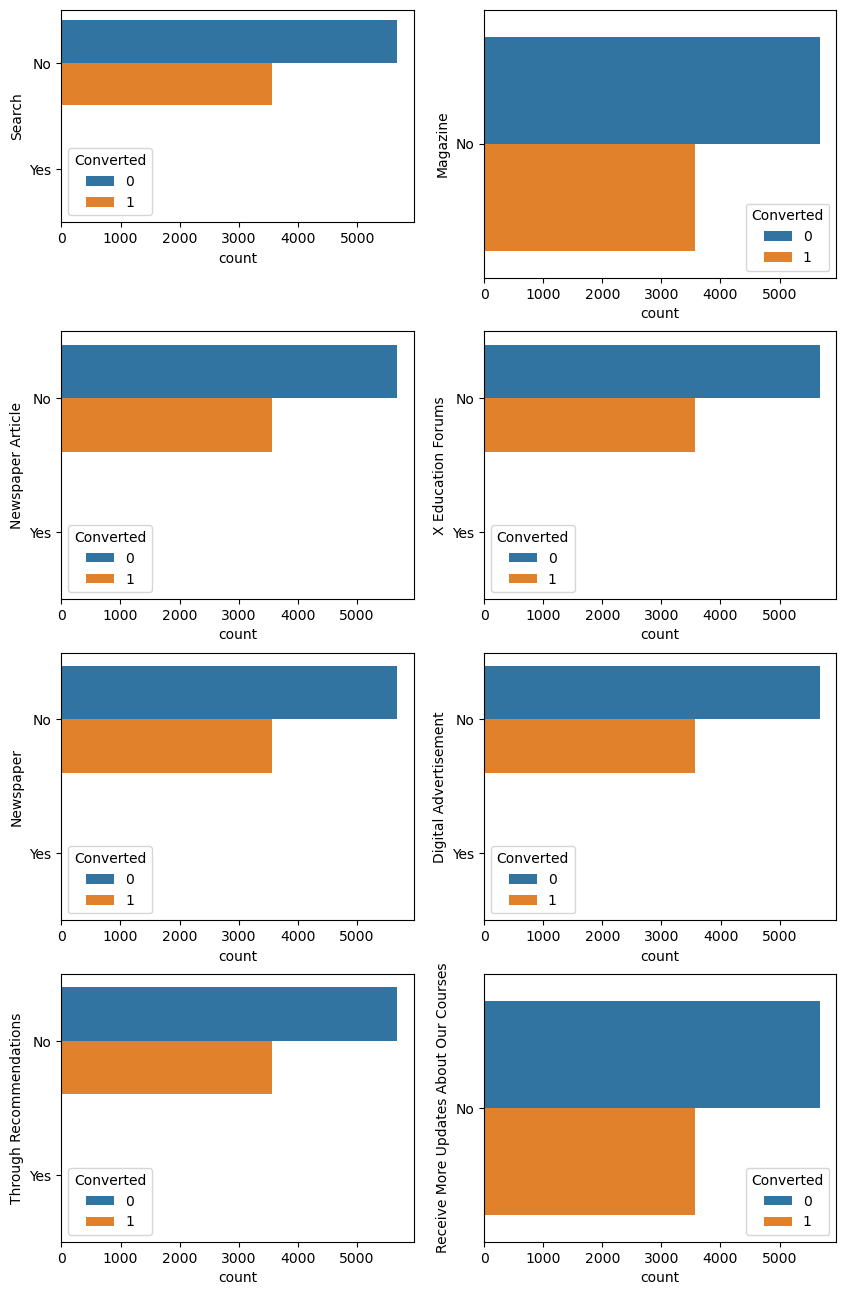

In [21]:
plt.figure(figsize=[10,16])
plt.subplot(5,2,1)
sns.countplot(y=df['Search'],hue=df.Converted)
plt.subplot(4,2,2)
sns.countplot(y=df['Magazine'],hue=df.Converted)
plt.subplot(4,2,3)
sns.countplot(y=df['Newspaper Article'],hue=df.Converted)
plt.subplot(4,2,4)
sns.countplot(y=df['X Education Forums'],hue=df.Converted)
plt.subplot(4,2,5)
sns.countplot(y=df['Newspaper'],hue=df.Converted)
plt.subplot(4,2,6)
sns.countplot(y=df['Digital Advertisement'],hue=df.Converted)
plt.subplot(4,2,7)
sns.countplot(y=df['Through Recommendations'],hue=df.Converted)
plt.subplot(4,2,8)
sns.countplot(y=df['Receive More Updates About Our Courses'],hue=df.Converted)
plt.show()

All the above columns like search, magazine, newspaper article etc have majority class as no, which means these columns are not important and can be dropped 

<Axes: xlabel='count', ylabel='Tags'>

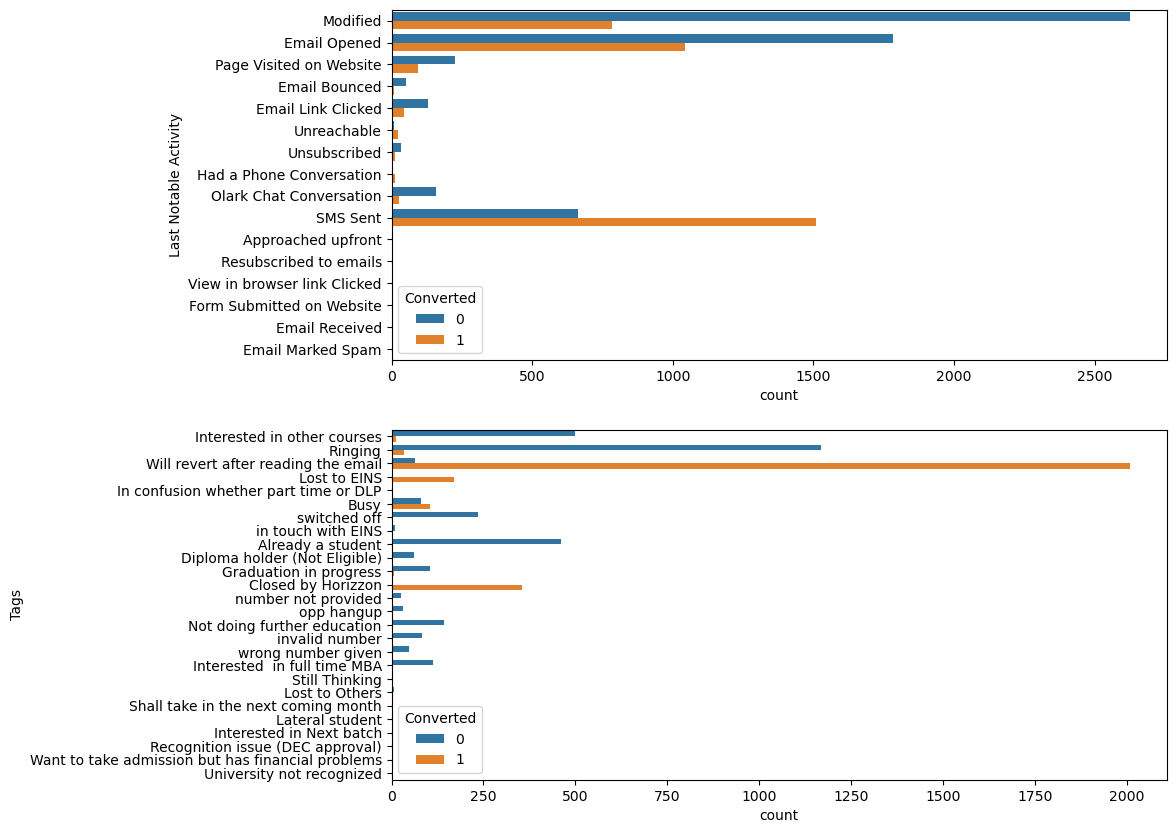

In [22]:
plt.figure(figsize=[10,10])
plt.subplot(2,1,1)
sns.countplot(y=df['Last Notable Activity'],hue=df.Converted)
plt.subplot(2,1,2)
sns.countplot(y=df['Tags'],hue=df.Converted)

Tags such as will revert after reading the email,Lost to Eins, Busy and Closed by horizzon have hoigh conversion will be important in modelling

### Taking relevant features for analysis

In [23]:
df = df[["Lead Origin","Lead Source","Do Not Email","Do Not Call","Converted","TotalVisits","Total Time Spent on Website",
        "Page Views Per Visit","What is your current occupation","What matters most to you in choosing a course",
        "Through Recommendations","Receive More Updates About Our Courses","Tags","Update me on Supply Chain Content",
        "Get updates on DM Content","Lead Profile","I agree to pay the amount through cheque",
         "A free copy of Mastering The Interview"]]

In [24]:
df.shape

(9240, 18)

In [25]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Unemployed,Better Career Prospects,No,No,Interested in other courses,No,No,Select,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Unemployed,Better Career Prospects,No,No,Ringing,No,No,Select,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Student,Better Career Prospects,No,No,Will revert after reading the email,No,No,Potential Lead,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unemployed,Better Career Prospects,No,No,Ringing,No,No,Select,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Unemployed,Better Career Prospects,No,No,Will revert after reading the email,No,No,Select,No,No


In [26]:
df.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Through Recommendations                             0
Receive More Updates About Our Courses              0
Tags                                             3353
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Lead Profile                                     2709
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
dtype: int64

### Filling Missing Values

In [27]:
df["Lead Source"].mode()[0]
df["TotalVisits"].median()
df["Total Time Spent on Website"].median()
df["Page Views Per Visit"].median()
df["What is your current occupation"].mode()[0]
df["What matters most to you in choosing a course"].mode()[0]
df["Tags"].mode()[0]
df["Lead Profile"].mode()[0]

'Select'

In [28]:
df["Lead Source"].fillna(df["Lead Source"].mode()[0],inplace = True)
df["TotalVisits"].fillna(df["TotalVisits"].median(),inplace = True)
df["Total Time Spent on Website"].fillna(df["Total Time Spent on Website"].median(),inplace = True)
df["Page Views Per Visit"].fillna(df["Page Views Per Visit"].median(),inplace = True)
df["What is your current occupation"].fillna(df["What is your current occupation"].mode()[0],inplace = True)
df["What matters most to you in choosing a course"].fillna(df["What matters most to you in choosing a course"].mode()[0],inplace = True)
df["Tags"].fillna(df["Tags"].mode()[0],inplace = True)
df["Lead Profile"].fillna(df["Lead Profile"].mode()[0],inplace = True)

In [29]:
df.isna().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
What is your current occupation                  0
What matters most to you in choosing a course    0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Tags                                             0
Update me on Supply Chain Content                0
Get updates on DM Content                        0
Lead Profile                                     0
I agree to pay the amount through cheque         0
A free copy of Mastering The Interview           0
dtype: int64

In [30]:
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
What is your current occupation                     6
What matters most to you in choosing a course       3
Through Recommendations                             2
Receive More Updates About Our Courses              1
Tags                                               26
Update me on Supply Chain Content                   1
Get updates on DM Content                           1
Lead Profile                                        6
I agree to pay the amount through cheque            1
A free copy of Mastering The Interview              2
dtype: int64

In [31]:
# changing the datatype to category
df["Lead Origin"]= df["Lead Origin"].astype("category")
df["Do Not Email"] = df["Do Not Email"].astype("category")
df["Do Not Call"] = df["Do Not Call"].astype("category")
df["Converted"] = df["Converted"].astype("category")
df["What is your current occupation"] = df["What is your current occupation"].astype("category")
df["What matters most to you in choosing a course"] = df["What matters most to you in choosing a course"].astype("category")
df["Through Recommendations"] = df["Through Recommendations"].astype("category")
df["Lead Profile"] = df["Lead Profile"].astype("category")
df["A free copy of Mastering The Interview"] = df["A free copy of Mastering The Interview"].astype("category")

In [32]:
df["Lead Profile"].value_counts()

Select                         6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [33]:
# changing select to potential lead - select is same as missing values
mask = df["Lead Profile"] == "Select"
df.loc[mask,"Lead Profile"] = "Potential Lead"

In [34]:
df["Lead Profile"].value_counts()

Potential Lead                 8468
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Select                            0
Name: Lead Profile, dtype: int64

### One Hot Encoding

In [35]:
df_dummies = pd.get_dummies(data = df.drop(["Converted"],axis = 1),drop_first = True)

In [36]:
df = pd.concat([df_dummies,df["Converted"]],axis = 1)

### Train Test Split

In [37]:
x = df.drop(columns = "Converted",axis = 1)
y = df["Converted"]

In [38]:
x.shape

(9240, 68)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
print(len(x_train))
print(len(x_test))
print(len(y_test))

7392
1848
1848


In [41]:
x_train.shape,x_test.shape

((7392, 68), (1848, 68))

In [42]:
x_train_dummies = x_train
x_test_dummies = x_test

In [43]:
x_train_dummies.shape, x_test_dummies.shape

((7392, 68), (1848, 68))

In [44]:
train_columns = set(x_train_dummies.columns)
test_columns = set(x_test_dummies.columns)

print("Unique columns in x_train but not in x_test:", train_columns - test_columns)
print("Unique columns in x_test but not in x_train:", test_columns - train_columns)


Unique columns in x_train but not in x_test: set()
Unique columns in x_test but not in x_train: set()


### Feature Scaling

In [45]:
scaler = MinMaxScaler()
numeric_columns = x_train.select_dtypes(include = ["int64","float64"]).columns
x_train_dummies[numeric_columns] = scaler.fit_transform(x_train_dummies[numeric_columns])
x_test_dummies[numeric_columns] = scaler.transform(x_test_dummies[numeric_columns])

In [46]:
numeric_columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

### Feature Selection

In [47]:
estimator = LogisticRegression()
rfe = RFE(estimator,n_features_to_select= 20)  
rfe = rfe.fit(x_train_dummies,y_train)
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False,  True, False,  True, False])

In [48]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Landing Page Submission', False, 42),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Origin_Quick Add Form', False, 37),
 ('Lead Source_Direct Traffic', False, 28),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Live Chat', False, 38),
 ('Lead Source_NC_EDM', False, 18),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Pay per Click Ads', False, 47),
 ('Lead Source_Press_Release', False, 15),
 ('Lead Source_Reference', False, 32),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Social Media', False, 19),
 ('Lead Source_WeLearn', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 27),
 ('Lead Source_blog', False, 14),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 45),
 

In [49]:
cols_to_keep = x_train_dummies.columns[rfe.support_]
cols_to_keep

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Do Not Email_Yes', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in Next batch', 'Tags_Interested in other courses',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not doing further education',
       'Tags_Will revert after reading the email', 'Tags_number not provided',
       'Tags_switched off', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [50]:
x_train = x_train_dummies[cols_to_keep]
x_test = x_test_dummies[cols_to_keep]

### Model Building

In [51]:
x_train = sm.add_constant(x_train,has_constant="add")
x_test = sm.add_constant(x_test,has_constant="add")

### Model 

In [52]:
st_model = sm.GLM(y_train,x_train,family= sm.families.Binomial())
st_model = st_model.fit()
print(st_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7371
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2473.8
Date:                Sat, 18 Nov 2023   Deviance:                       4947.5
Time:                        19:31:23   Pearson chi2:                 1.30e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4845
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [53]:
x_train = x_train.drop(["Lead Source_google"],axis = 1)
x_test = x_test.drop(["Lead Source_google"],axis = 1)

### Model 1

In [54]:
st_model_1 = sm.GLM(y_train,x_train,family= sm.families.Binomial())
st_model_1 = st_model_1.fit()
print(st_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7372
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2476.5
Date:                Sat, 18 Nov 2023   Deviance:                       4953.0
Time:                        19:31:23   Pearson chi2:                 1.30e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4841
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [55]:
x_train = x_train.drop(["Tags_Lateral student"],axis = 1)
x_test = x_test.drop(["Tags_Lateral student"],axis = 1)

### Model 2

In [56]:
st_model_2 = sm.GLM(y_train,x_train,family= sm.families.Binomial())
st_model_2 = st_model_2.fit()
print(st_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7373
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2487.0
Date:                Sat, 18 Nov 2023   Deviance:                       4974.0
Time:                        19:31:23   Pearson chi2:                 1.30e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4826
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [57]:
x_train = x_train.drop(["Tags_Interested in Next batch"],axis = 1)
x_test = x_test.drop(["Tags_Interested in Next batch"],axis = 1)

### Model 3

In [58]:
st_model_3 = sm.GLM(y_train,x_train,family= sm.families.Binomial())
st_model_3 = st_model_3.fit()
print(st_model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2497.7
Date:                Sat, 18 Nov 2023   Deviance:                       4995.4
Time:                        19:31:24   Pearson chi2:                 1.29e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4811
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [59]:
x_train = x_train.drop(["Tags_number not provided"],axis = 1)
x_test = x_test.drop(["Tags_number not provided"],axis = 1)

### Model 4

In [60]:
st_model_4 = sm.GLM(y_train,x_train,family= sm.families.Binomial())
st_model_4 = st_model_4.fit()
print(st_model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7375
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2499.2
Date:                Sat, 18 Nov 2023   Deviance:                       4998.5
Time:                        19:31:24   Pearson chi2:                 1.29e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4809
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [61]:
x_train = x_train.drop(["Tags_switched off"],axis = 1)
x_test = x_test.drop(["Tags_switched off"],axis = 1)

### Model 5

In [62]:
st_model_5 = sm.GLM(y_train,x_train,family= sm.families.Binomial())
st_model_5 = st_model_5.fit()
print(st_model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2499.8
Date:                Sat, 18 Nov 2023   Deviance:                       4999.6
Time:                        19:31:24   Pearson chi2:                 1.29e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4808
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [63]:
x_train = x_train.drop(["Tags_Interested in other courses"],axis = 1)
x_test = x_test.drop(["Tags_Interested in other courses"],axis = 1)

### Model 6

In [64]:
st_model_6 = sm.GLM(y_train,x_train,family= sm.families.Binomial())
st_model_6 = st_model_6.fit()
print(st_model_6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2500.8
Date:                Sat, 18 Nov 2023   Deviance:                       5001.6
Time:                        19:31:24   Pearson chi2:                 1.28e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4807
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [65]:
x_train = x_train.drop(["Tags_Interested  in full time MBA"],axis = 1)
x_test = x_test.drop(["Tags_Interested  in full time MBA"],axis = 1)

### Model 7

In [66]:
st_model_7 = sm.GLM(y_train,x_train,family= sm.families.Binomial())
st_model_7 = st_model_7.fit()
print(st_model_7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.5
Date:                Sat, 18 Nov 2023   Deviance:                       5005.0
Time:                        19:31:24   Pearson chi2:                 1.26e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4805
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [67]:
x_train = x_train.drop(["Tags_Not doing further education"],axis = 1)
x_test = x_test.drop(["Tags_Not doing further education"],axis = 1)

### Model 8

In [68]:
st_model_8 = sm.GLM(y_train,x_train,family= sm.families.Binomial())
st_model_8 = st_model_8.fit()
print(st_model_8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2505.5
Date:                Sat, 18 Nov 2023   Deviance:                       5011.0
Time:                        19:31:24   Pearson chi2:                 1.17e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4800
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Variance inflation factor

In [69]:
vif_data = pd.DataFrame()
vif_data["Features"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values,i) for i in range(len(x_train.columns))]
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Features,VIF
0,const,57.536494
5,What is your current occupation_Unemployed,4.085275
6,What is your current occupation_Working Profes...,4.043971
2,Lead Origin_Lead Add Form,1.522414
12,Lead Profile_Student of SomeSchool,1.498828
11,Lead Profile_Potential Lead,1.451453
8,Tags_Closed by Horizzon,1.290234
10,Tags_Will revert after reading the email,1.285318
3,Lead Source_Welingak Website,1.262962
1,Total Time Spent on Website,1.082408


As we can see that VIF of all the features are less than 5 we can proceed with predictions

In [70]:
y_train_pred = st_model_8.predict(x_train)
y_train_pred[:10]

295     0.343708
1657    0.309681
4592    0.972731
3558    0.228924
629     0.356753
125     0.247292
3539    0.008100
719     0.001959
4015    0.266249
2175    0.278366
dtype: float64

#### Creating dataframe with actual converted and the predicted probbilities

In [71]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
295,0,0.343708,295
1657,0,0.309681,1657
4592,1,0.972731,4592
3558,0,0.228924,3558
629,0,0.356753,629


#### Creating new column predicted with 1 if converted_prob > 0.5 else 0 

In [72]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
295,0,0.343708,295,0
1657,0,0.309681,1657,0
4592,1,0.972731,4592,1
3558,0,0.228924,3558,0
629,0,0.356753,629,0


In [73]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[4226  328]
 [ 656 2182]]


In [74]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8668831168831169


## Metrics beyond simply accuracy

In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7688513037350246

In [77]:
# Let us calculate specificity
TN / float(TN+FP)

0.9279754062362758

In [78]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07202459376372419


In [79]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8656288406390823


### Roc Curve

In [80]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

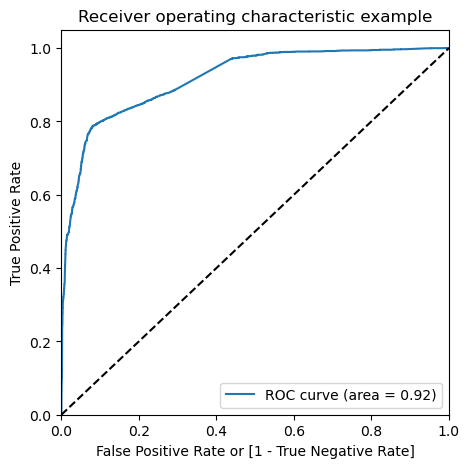

In [82]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [83]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
295,0,0.343708,295,0,1,1,1,1,0,0,0,0,0,0
1657,0,0.309681,1657,0,1,1,1,1,0,0,0,0,0,0
4592,1,0.972731,4592,1,1,1,1,1,1,1,1,1,1,1
3558,0,0.228924,3558,0,1,1,1,0,0,0,0,0,0,0
629,0,0.356753,629,0,1,1,1,1,0,0,0,0,0,0


In [84]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383929  1.000000  0.000000
0.1   0.1  0.694670  0.977449  0.518445
0.2   0.2  0.717803  0.970754  0.560167
0.3   0.3  0.818047  0.844257  0.801713
0.4   0.4  0.860525  0.799154  0.898770
0.5   0.5  0.866883  0.768851  0.927975
0.6   0.6  0.858766  0.726920  0.940931
0.7   0.7  0.836039  0.645173  0.954985
0.8   0.8  0.805601  0.530655  0.976943
0.9   0.9  0.747700  0.355532  0.992095


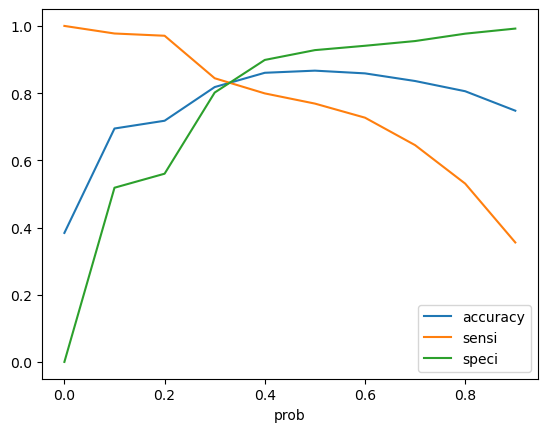

In [85]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [86]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
295,0,0.343708,295,0,1,1,1,1,0,0,0,0,0,0,0
1657,0,0.309681,1657,0,1,1,1,1,0,0,0,0,0,0,0
4592,1,0.972731,4592,1,1,1,1,1,1,1,1,1,1,1,1
3558,0,0.228924,3558,0,1,1,1,0,0,0,0,0,0,0,0
629,0,0.356753,629,0,1,1,1,1,0,0,0,0,0,0,1


In [87]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
295,0,0.343708,295,0,1,1,1,1,0,0,0,0,0,0,0,34
1657,0,0.309681,1657,0,1,1,1,1,0,0,0,0,0,0,0,31
4592,1,0.972731,4592,1,1,1,1,1,1,1,1,1,1,1,1,97
3558,0,0.228924,3558,0,1,1,1,0,0,0,0,0,0,0,0,23
629,0,0.356753,629,0,1,1,1,1,0,0,0,0,0,0,1,36


## Model Evaluation

In [88]:
# Let's check the overall accuracy.
print('Accuracy :', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted ))

Accuracy : 0.8668831168831169


In [89]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted  )
confusion2

array([[4226,  328],
       [ 656, 2182]], dtype=int64)

In [90]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [91]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7688513037350246

In [92]:
# Let us calculate specificity
TN / float(TN+FP)

0.9279754062362758

In [93]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07202459376372419


In [94]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8693227091633466


In [95]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8656288406390823


### Precision and Recall

In [96]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted  )
confusion

array([[4226,  328],
       [ 656, 2182]], dtype=int64)

#### Precision

TP / TP + FP

In [97]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8693227091633466

##### Recall
TP / TP + FN

In [98]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7688513037350246

In [99]:
y_train_pred_final.Converted , y_train_pred_final.predicted

(295     0
 1657    0
 4592    1
 3558    0
 629     0
        ..
 7891    1
 9225    0
 4859    0
 3264    0
 2732    0
 Name: Converted, Length: 7392, dtype: category
 Categories (2, int64): [0, 1],
 295     0
 1657    0
 4592    1
 3558    0
 629     0
        ..
 7891    1
 9225    0
 4859    0
 3264    0
 2732    0
 Name: predicted, Length: 7392, dtype: int64)

In [100]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted,  y_train_pred_final.Converted_prob)

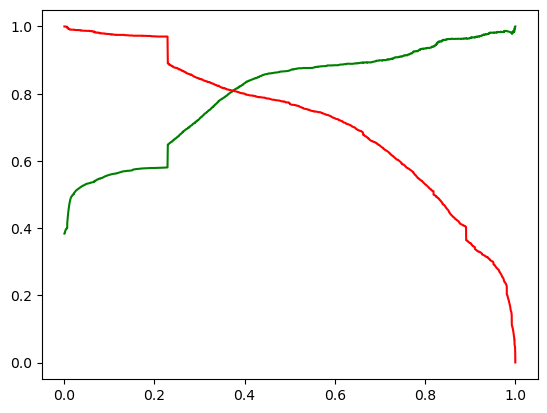

In [101]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

Assigning columns from the model to test data

In [102]:
x_test = x_test[x_train.columns]
x_test.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
2212,1.0,0.483715,0,0,0,1,0,0,0,0,0,1,0
3034,1.0,0.548856,1,0,0,1,0,0,0,1,0,1,0
4492,1.0,0.087148,0,0,0,1,0,0,0,0,1,1,0
5063,1.0,0.107835,0,0,1,1,0,0,0,0,0,1,0
7645,1.0,0.000000,0,0,0,1,0,0,0,0,1,1,0


In [103]:
y_test_pred = st_model_8.predict(x_test)

In [104]:
y_test_pred

2212    0.050181
3034    0.999670
4492    0.302376
5063    0.002477
7645    0.228924
          ...   
5741    0.861977
1326    0.572365
7327    0.996966
7700    0.012398
3852    0.661908
Length: 1848, dtype: float64

In [105]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
2212,0.050181
3034,0.999670
4492,0.302376
5063,0.002477
7645,0.228924


In [106]:
y_test_df = pd.DataFrame(y_test)

In [107]:
y_test_df["Prospect ID"] = y_test_df.index

In [108]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [109]:
# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [110]:
y_pred_final

,Converted,Prospect ID,0
0,0,2212,0.050181
1,1,3034,0.999670
2,0,4492,0.302376
3,0,5063,0.002477
4,0,7645,0.228924
...,...,...,...
1843,1,5741,0.861977
1844,1,1326,0.572365
1845,1,7327,0.996966
1846,0,7700,0.012398


In [111]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'})

In [112]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Probability
0,0,2212,0.050181
1,1,3034,0.999670
2,0,4492,0.302376
3,0,5063,0.002477
4,0,7645,0.228924


In [113]:
# Creating a new column predicted
y_pred_final['Predicted'] = y_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.35 else 0)

In [114]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Probability,Predicted
0,0,2212,0.050181,0
1,1,3034,0.999670,1
2,0,4492,0.302376,0
3,0,5063,0.002477,0
4,0,7645,0.228924,0


### Accuracy

In [115]:
# Let's check the overall accuracy.
print("Accuracy :", metrics.accuracy_score(y_pred_final.Converted ,y_pred_final.Predicted))

Accuracy : 0.8544372294372294


In [116]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted )
confusion2

array([[986, 139],
       [130, 593]], dtype=int64)

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ", TP / float(TP+FN))

Sensitivity :  0.8201936376210235


In [119]:
# Let us calculate specificity
print("Specificity :", TN / float(TN+FP))

Specificity : 0.8764444444444445


### Precision and Recall for Test Data

In [120]:
print("Precision :", confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision : 0.8693227091633466


In [121]:
print("Recall :", confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7688513037350246


## Lead Score

In [122]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Probability.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Prospect ID,Converted_Probability,Predicted,Lead_Score
0,0,2212,0.050181,0,5
1,1,3034,0.999670,1,100
2,0,4492,0.302376,0,30
3,0,5063,0.002477,0,0
4,0,7645,0.228924,0,23


In [123]:
Hot_Leads = y_pred_final[(y_pred_final["Lead_Score"]>85)]

In [124]:
Hot_Leads = pd.DataFrame(Hot_Leads.index)

In [125]:
Hot_Leads.values.reshape(-1)

array([   1,   17,   21,   23,   24,   27,   39,   45,   46,   52,   57,
         71,   74,   90,   94,  105,  114,  122,  126,  127,  131,  133,
        135,  139,  142,  154,  159,  161,  163,  167,  171,  177,  182,
        196,  198,  205,  219,  223,  226,  229,  232,  237,  239,  243,
        252,  253,  255,  259,  273,  274,  278,  282,  302,  310,  311,
        316,  324,  333,  342,  345,  354,  362,  363,  365,  367,  368,
        369,  375,  390,  392,  407,  409,  410,  419,  422,  427,  428,
        429,  431,  432,  434,  435,  438,  441,  443,  446,  467,  474,
        476,  493,  502,  503,  505,  507,  509,  516,  518,  532,  537,
        547,  552,  555,  560,  562,  567,  570,  576,  582,  585,  596,
        609,  610,  613,  620,  621,  624,  638,  642,  652,  656,  662,
        663,  678,  680,  691,  692,  693,  697,  699,  703,  712,  717,
        718,  724,  736,  737,  748,  775,  778,  779,  780,  782,  786,
        789,  794,  806,  808,  809,  811,  812,  8

### Hot Leads are the customers with lead score more than 85 and are potenial customers for X education

In [126]:
st_model_8.params.sort_values(ascending= False)

Tags_Closed by Horizzon                                 8.017619
Tags_Lost to EINS                                       7.359343
Total Time Spent on Website                             4.341895
Tags_Busy                                               3.995374
Tags_Will revert after reading the email                3.826472
Lead Origin_Lead Add Form                               3.313503
Lead Source_Welingak Website                            1.847654
What is your current occupation_Working Professional    1.546428
What is your current occupation_Unemployed             -1.174429
Lead Profile_Potential Lead                            -1.213183
Do Not Email_Yes                                       -1.425548
const                                                  -2.653255
Lead Profile_Student of SomeSchool                     -2.918567
dtype: float64

## Top Recommendations

### X Education should focus on clientele meeting the following criteria:

### 1) "If someone has interacted with Horizon, lost tags to Eins, and reads our email, they're more likely to convert."

### 2) "People who spend a lot of time on our platform could become clients."

### 3) "Leads from the Welingak website, especially high school students using our forms, are more likely to convert."

### 4) "Working professionals and the unemployed looking to upgrade themselves are great leads for X Education."

### 5) "Those who ask X Education to email them are more likely to become customers."